In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
nltk.download('stopwords')
import nltk
import re
import tensorflow
import torch
import nltk; nltk.download('wordnet')
import os
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import ktrain
from ktrain import text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohsenboughriou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mohsenboughriou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df=pd.read_csv(r'path...../labeled_data.csv')
df1=pd.read_csv(r'path...../TwitterHate.csv')
#hate speech is labelled by 0
#offensive is labelled by 1
#neither is labeled by 2

In [3]:
col=[0,1,2,3,4]
df=df.drop(df.columns[col], axis=1)

In [4]:
# Replace values in pandas DataFrame.
df['class'] = df['class'].replace([0],1)
df['class'] = df['class'].replace([2],0)
df['class'].value_counts()

1    20620
0     4163
Name: class, dtype: int64

In [5]:
df1=df1.drop('id',axis=1)
df1=df1.rename(columns={'label':'class'})

In [6]:
df1['class'].value_counts()

0    29720
1     2242
Name: class, dtype: int64

In [7]:
df2=df1.loc[df1['class'] == 0]
df1=df2.iloc[0:16457]
df=pd.concat([df,df1], axis=0)

In [8]:
#now we have our data set balanced
df['class'].value_counts()

0    20620
1    20620
Name: class, dtype: int64

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


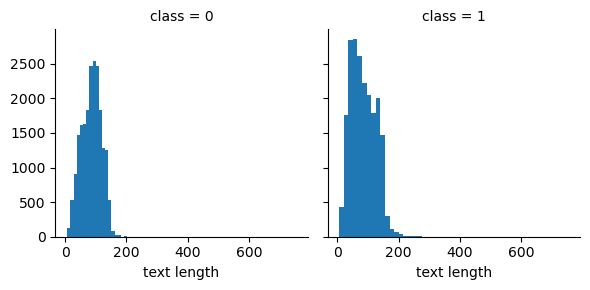

In [10]:
df['text length'] = df['tweet'].apply(len)
graph = sns.FacetGrid(data=df, col='class')
graph.map(plt.hist, 'text length', bins=50)

In [9]:
tweet=df.tweet

In [10]:
tweet=(tweet)
tweet.reset_index(drop=True, inplace=True)

In [12]:
stopwords = nltk.corpus.stopwords.words("english")

other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

def preprocess(tweet):  
    
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat,' ')

    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    tweet_lower = newtweet.str.lower()
    
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

processed_tweets = preprocess(tweet)   

df['processed_tweets'] = processed_tweets
print(df[["tweet","processed_tweets"]].head(10))

/var/folders/xb/qwgsqylj7j7c10t_q8rvnf_c0000gn/T/ipykernel_8289/2767197856.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
/var/folders/xb/qwgsqylj7j7c10t_q8rvnf_c0000gn/T/ipykernel_8289/2767197856.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=punc_remove.str.replace(r'\s+', ' ')
/var/folders/xb/qwgsqylj7j7c10t_q8rvnf_c0000gn/T/ipykernel_8289/2767197856.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
/var/folders/xb/qwgsqylj7j7c10t_q8rvnf_c0000gn/T/ipykernel_8289/2767197856.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')


                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...   
6  !!!!!!"@__BrighterDays: I can not just sit up ...   
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...   
8  " &amp; you might not get ya bitch back &amp; ...   
9  " @rhythmixx_ :hobbies include: fighting Maria...   

                                    processed_tweets  
0  woman complain cleaning house amp man always t...  
1  boy dats cold tyga dwn bad cuffin dat hoe st p...  
2       dawg ever fuck bitch start cry confused shit  
3                                   look like tranny  
4     shit hear might true might faker bitch told ya  
5  shit blows claim faithful somebody still fucki... 

In [14]:
processed_tweets=tweet

In [15]:
length_of_sentence = [len(i) for i in processed_tweets]

#the longest sentence index
print(length_of_sentence.index(max(length_of_sentence)))
print(processed_tweets[8203])
print(len(processed_tweets[8203].split()))

17865
Brrr hoe dichter bij het Sint gebeuren hoe racistischer de drek op twitter en het komt nagenoeg alleen van de proZwartePieten hoek. Engvolk
23


In [16]:
y=df['class']

In [17]:
X_train,X_val,y_train,y_val=train_test_split(processed_tweets,y, train_size=0.7,test_size=0.3, random_state=42)

In [18]:
X_train=list(X_train)
y_train=list(y_train)
X_val=list(X_val)
y_val=list(y_val)
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

28867
28867
12372
12372


In [20]:
model_name= 'distilbert-base-uncased'
labels = ['No hate speech','Hate speech']
p = text.Transformer(model_name,maxlen=23, classes=labels)
train_set = p.preprocess_train(X_train, y_train)
val_set = p.preprocess_test(X_val, y_val)
model = p.get_classifier()
learner = ktrain.get_learner(model, train_data=train_set, val_data= val_set, batch_size=512)

preprocessing train...
language: en
train sequence lengths:
	mean : 14
	95percentile : 25
	99percentile : 28


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 14
	95percentile : 25
	99percentile : 28


In [21]:
my_callbacks = [tensorflow.keras.callbacks.EarlyStopping(patience=5)]


In [22]:
history=learner.fit(0.0005, 5 ,callbacks=my_callbacks,lr_decay=0.5)

Epoch 1/5
57/57 [==============================] - 566s 10s/step - loss: 0.3580 - accuracy: 0.8214 - val_loss: 0.1647 - val_accuracy: 0.9355
Epoch 2/5
57/57 [==============================] - 646s 11s/step - loss: 0.1191 - accuracy: 0.9557 - val_loss: 0.1648 - val_accuracy: 0.9332
Epoch 3/5
57/57 [==============================] - 674s 12s/step - loss: 0.0655 - accuracy: 0.9790 - val_loss: 0.2118 - val_accuracy: 0.9355
Epoch 4/5
57/57 [==============================] - 736s 13s/step - loss: 0.0371 - accuracy: 0.9901 - val_loss: 0.2457 - val_accuracy: 0.9334
Epoch 5/5
57/57 [==============================] - 748s 13s/step - loss: 0.0284 - accuracy: 0.9923 - val_loss: 0.3038 - val_accuracy: 0.9296


In [23]:
predictor=ktrain.get_predictor(learner.model, preproc=p)
predictor.save(r'..../DistilBert model')

In [24]:
learner.view_top_losses(n=3,preproc=p)

387/387 [==============================] - 56s 139ms/step
----------
id:3859 | loss:7.42 | true:Hate speech | pred:No hate speech)

----------
id:2450 | loss:7.42 | true:Hate speech | pred:No hate speech)

----------
id:8752 | loss:7.42 | true:Hate speech | pred:No hate speech)



In [25]:
X_val[3859]

'Haha Tanaka went Yankee. So sorry Bums!'

In [27]:
X_val[2450]

'In redneck land ;) #Tennessee'

In [28]:
X_val[8752]

"#NationalCatDay ...sure. Celebrate over 1 BILLION bird deaths and blame it on #climatechange you fuckin' #commies."

In [29]:
learner.validate(val_set, class_names=labels)

387/387 [==============================] - 52s 133ms/step
                precision    recall  f1-score   support

No hate speech       0.93      0.93      0.93      6236
   Hate speech       0.93      0.93      0.93      6136

      accuracy                           0.93     12372
     macro avg       0.93      0.93      0.93     12372
  weighted avg       0.93      0.93      0.93     12372



array([[5807,  429],
       [ 442, 5694]])

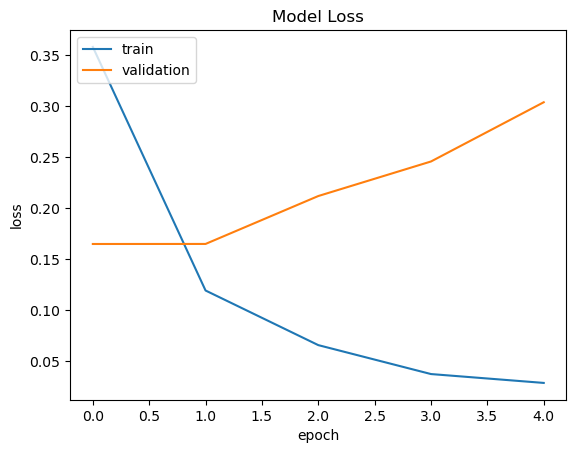

In [30]:
learner.plot(plot_type='loss', return_fig=False)

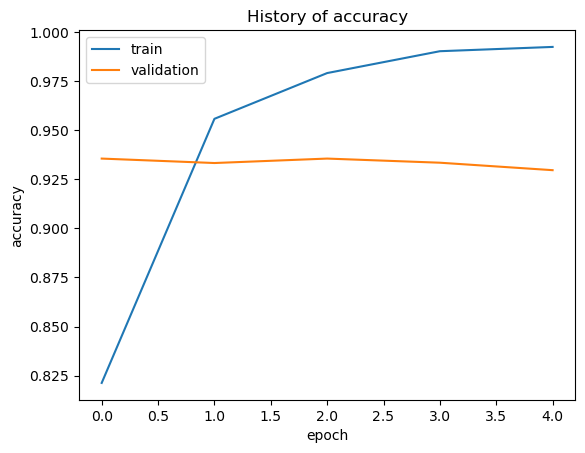

In [31]:
learner.plot(plot_type='accuracy', return_fig=False)

In [33]:
predictor.predict('I like your T-shirt')

1/1 [==============================] - 2s 2s/step


'No hate speech'